<a href="https://colab.research.google.com/github/rushi2012/Assignment_2/blob/main/Titanic_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [450]:
#Import Libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [451]:
#Import CSV file
df1 = pd.read_csv('/content/train (2).csv')
df2 = pd.read_csv('/content/test (1).csv')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [452]:
# Get the dimensions of the Dataframe
df1.shape

(891, 12)

In [453]:
#Checke the Head of Dataframe
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [454]:
#Get the Information of the train dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [455]:
# Verify for the null values for train data
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [456]:
# verify the null values for test dataset
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [457]:
# Drop the null values
df2 = df2.dropna()

In [458]:
# Drop the null values for df1 = df1.dropna()

In [462]:
df2.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [478]:
#Check the correlation between variables
corr = df1.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.148495,-0.089136,0.030933,-0.083488,-0.051454,0.029740
Survived,0.148495,1.000000,-0.034542,-0.254085,0.106346,0.023582,0.134241
Pclass,-0.089136,-0.034542,1.000000,-0.306514,-0.103592,0.047496,-0.315235
Age,0.030933,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,-0.092424
SibSp,-0.083488,0.106346,-0.103592,-0.156162,1.000000,0.255346,0.286433
Parch,-0.051454,0.023582,0.047496,-0.271271,0.255346,1.000000,0.389740
Fare,0.029740,0.134241,-0.315235,-0.092424,0.286433,0.389740,1.000000


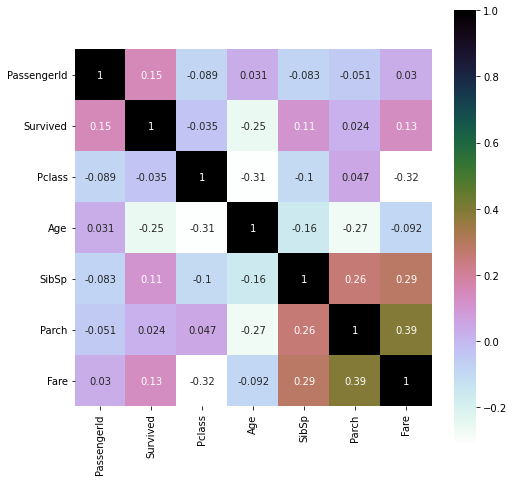

In [479]:
# Plot heatmap 
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [463]:
# Import Sklearn Library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [464]:
# Get the OneHot Encoder for Object in train dataset
from sklearn.preprocessing import OneHotEncoder
columns =['Sex','Embarked'] 
for column in columns:
  df2[column]= OneHotEncoder().fit_transform((df2[column]).values.reshape(-1,1)).toarray()

#encoded_columns= pd.get_dummies(df1.Sex)
#en = pd.get_dummies(df1.Embarked)
#df1 = df1.join(encoded_columns)
#df1 = df1.join(en)
#print(df1)
#df1.head()

In [466]:
# Get the OneHot Encoder for Object in test dataset
columns =['Sex','Embarked'] 
for column in columns:
  df2[column]= OneHotEncoder().fit_transform((df2[column]).values.reshape(-1,1)).toarray()
#df2['Sex']= OneHotEncoder().fit_transform((df2['Sex']).values.reshape(-1,1)).toarray()
#df2['Embarked'] = OneHotEncoder().fit_transform((df1['Embarked']).values.reshape(-1,1)).toarray()

In [467]:
'''en2= pd.get_dummies(df2.Sex)
en3 = pd.get_dummies(df2.Embarked)

df2 = df2.join(en2)
df2 = df2.join(en3)
print(df2)
df2.head()'''

'en2= pd.get_dummies(df2.Sex)\nen3 = pd.get_dummies(df2.Embarked)\n\ndf2 = df2.join(en2)\ndf2 = df2.join(en3)\nprint(df2)\ndf2.head()'

In [468]:
#from sklearn.preprocessing import LabelEncoder
#en = LabelEncoder()
#df1['Sex'] = en.fit_transform(df1['Sex'])
#df1['Embarked'] = en.fit_transform(df1['Embarked'])
#df2['Sex'] = en.fit_transform(df2['Sex'])
#df2['Embarked'] = en.fit_transform(df2['Embarked'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [469]:
#Drop columns from train and test dataset
X1 = df1.drop(['Name','Survived', 'Ticket', 'Cabin', 'Sex','Embarked'], axis=1)
y1 = df1['Survived']
df2 = df2.drop(['Name', 'Cabin','Ticket'], axis=1)

In [470]:
df2 = df2.drop(['Sex', 'Embarked'], axis=1)

In [471]:
# Assign train and test split
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=.25)

In [472]:
# Train Logistic Model
model = LogisticRegression(verbose=1)
model.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=1)

In [473]:
# Check the accuracy, f1 score and precision
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.54      0.61        13
           1       0.83      0.91      0.87        33

    accuracy                           0.80        46
   macro avg       0.77      0.72      0.74        46
weighted avg       0.80      0.80      0.80        46



In [474]:
predictions = model.predict(df2)
print(predictions)# printing predictions

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [477]:
# Import Randomforest Model
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(X_train, y_train)
test_pred = rfcl.predict(X_test)
rfcl_score=rfcl.score(X_test , y_test)
print("The Random forest model accuracy is {}".format(rfcl_score))
print("The confusion matrix of Random Forest Model is")

The Random forest model accuracy is 0.8043478260869565
The confusion matrix of Random Forest Model is
